In [2]:
import os
import soundfile as sf
import numpy as np
import pandas as pd
import glob
import librosa, librosa.display
import sklearn
import random as rn
import torch
import torch.nn as nn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# load audio files
data_path = "D:\\ksponspeech\\한국어 음성\\한국어_음성_분야"
dataset = []

for folder in os.listdir(data_path):
    if not folder.startswith('KsponSpeech'): # ignore other subfolders
        continue
    
    sub_path = os.path.join(data_path,folder)
    
    for i, subfolder in enumerate(os.listdir(sub_path)):
        path = os.path.join(data_path,folder,subfolder)
        for j, filename in enumerate(os.listdir(path)):
            if filename.endswith('.pcm'):
                file = path+"\\"+filename
                pcm = np.memmap(file, dtype='h', mode='r').astype('float32')
                pcm = pcm / 32767 # normalize
                mfcc = librosa.feature.mfcc(pcm)
                np.save(f'./data/{filename}',mfcc)
                
            elif filename.endswith('.wav') or filename.endswith('.flac'):
                file = path+"\\"+filename
                wav, sr = librosa.load(file, sr=16000)
                mfcc = librosa.feature.mfcc(wav)
                np.save(f'./data/{filename}',mfcc)

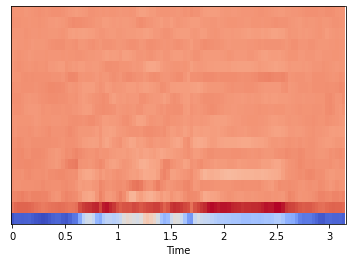

In [3]:
FIG_SIZE = (7.5,5)

test = np.load('./data/KsponSpeech_000001.pcm.npy')
librosa.display.specshow(test, sr=16000, x_axis='time')

In [12]:
transcripts = pd.read_table('transcripts.txt',sep='\t',lineterminator='\r',encoding='cp949',names=['path','script','vector'])
transcripts[:5]

,path,script,vector
0,KsponSpeech_01\KsponSpeech_0001\KsponSpeech_00...,아 몬 소리야 그건 또.,8 3 724 3 174 33 27 3 5 101 3 127 4
1,\nKsponSpeech_01\KsponSpeech_0001\KsponSpeech_...,나는 악습은 원래 없어진다 없어져야 된다고 생각하긴 했는데 근데 그 약간 필요악으로...,16 7 3 425 366 25 3 84 35 3 78 11 56 18 3 78 1...
2,\nKsponSpeech_01\KsponSpeech_0001\KsponSpeech_...,그래서 지호랑 계단 올라와서 막 위에 운동하는 기구 있대요. 그서 그걸로 운동 할려구요.,5 35 19 3 13 289 97 3 143 124 3 210 34 160 19 ...
3,\nKsponSpeech_01\KsponSpeech_0001\KsponSpeech_...,뭐 정신과 병원도 그 약 타서 먹어보고 그 한동안 연락이 안 된 적이 있었단 말이야...,42 3 86 146 188 3 370 84 21 3 5 3 100 3 191 19...
4,\nKsponSpeech_01\KsponSpeech_0001\KsponSpeech_...,그게 영 점 일 프로 가정의 아이들과 가정의 모습이야?,5 22 3 153 3 207 3 41 3 257 40 3 9 86 132 3 8 ...
